# Precision-Recall Trade-Off
When dealing with classification problems there is a trade-off between two fundamental metrics: the **precision score** and the **recall score**. 

Before defining these metrics, we first need to think about the four potential outcomes of any binary classification:
* **True positive (TP)**: Samples with positive class, correctly classified positive
* **True negative (TN)**: Samples with negative class, correctly classified negative
* **False positive (FP)**: Samples with negative class, wrongly classified positive
* **False negative (FN)**: Samples with positive class, wrongly classified negative

With this we can define the two metrics:

The **precision score** gives the percentage of the correct positive classifications (`TP`) on all positive classifications (`TP + FP`):
$$\frac{\sum{TP}}{\sum{TP}+\sum{FP}}$$
The **recall score** gives the percentage of the correct positive classifications (`TP`) on all positive samples (`TP + FN`):
$$\frac{\sum{TP}}{\sum{TP}+\sum{FN}}$$

In the following I will create a synthetic dataset to illustrate the trade off between these two metrics.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [52]:
X, y = make_classification(n_samples=100_000, n_features=20, n_informative=5, weights=[0.8, 0.2], random_state=0)
print(f"Number of instances with negative class: {np.sum(y==1)}")
print(f"Number of instances with positive class: {np.sum(y==0)}")

Number of instances with negative class: 20320
Number of instances with positive class: 79680


We will train a Random Forest on the training set and predict the class probabilities for the test set.

In [54]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit the model and predict class probabilities
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
preds_proba = rf.predict_proba(X_test)[:,1] # class probabilities will refer to the positive class
preds_proba

array([0.05, 0.02, 0.55, ..., 0.  , 0.98, 0.47])

With that, and the true labels of the samples from the test set, we can calculate the precision and recall of the classification results for various thresholds. The threshold controls how we assign classes based on the class probabilties. Basically we say that if `p(positive) > threshold` we want to assign the positive class, else the negative class.

The lower we set this threshold, the higher the recall of our model, since we are more generous in assigning the positive class. However, this also implies that the precision of the model will be low, since we receive more false positive classifications at the same time. By increasing the threshold we can improve the precision, but again only at the costs of the recall of our model.

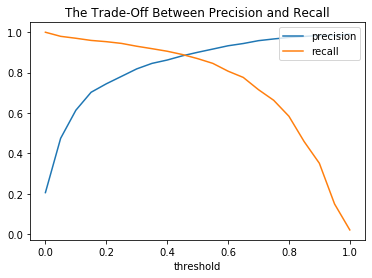

In [59]:
# Calculate precision and recall score for various thresholds
thresholds = np.arange(0.00, 1.05, 0.05)
precision_scores = [precision_score(y_test, preds_proba>=t) for t in thresholds]
recall_scores = [recall_score(y_test, preds_proba>=t) for t in thresholds]

# Plot the results 
plt.title("The Trade-Off Between Precision and Recall")
plt.plot(thresholds, precision_scores, label='precision')
plt.plot(thresholds, recall_scores, label='recall')
plt.xlabel('threshold')
plt.legend(loc='upper right')
plt.show()

It depends on our business question which threshold we should use. There can be some cases where we see higher priority in high precision scores, and other cases for which recall is more important. It is advisable to **think about this trade off even before training and tuning a model** since it can narrow the focus of the model development. For example, if the business requires a precision score of 85% (e.g. for a fraud detection system, we might want to ensure that we make only 15% wrong accusations to non fraudulent customers), we can concentrate on increasing the recall for a given 85% precision score instead of trying to reach a stronger bending of the whole curve.